In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
import json

In [ ]:
a = qml.QubitUnitary(np.array([[np.sqrt(1/2), np.sqrt(1/2)], [np.sqrt(1/2), -np.sqrt(1/2)]]), wires=0)

In [ ]:
qml.simplify(a)

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(np.array([[np.sqrt(1/2), np.sqrt(1/2)], [np.sqrt(1/2), -np.sqrt(1/2)]]), wires=0)
    return qml.expval(qml.PauliZ(0))

qml.draw_mpl(circuit)()

In [1]:
import numpy as np
from scipy.stats import unitary_group
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile

[[ 0.04265189+0.10178505j  0.10525585-0.15164886j  0.12625574+0.46466158j
   0.76479856-0.37010366j]
 [ 0.28842118-0.02535569j  0.42233361-0.34725063j -0.66695548+0.13223661j
  -0.25500571-0.29979591j]
 [ 0.2806923 +0.90547508j -0.08270422-0.08476256j  0.11132482+0.14737898j
  -0.17933069+0.14501294j]
 [-0.00939641-0.07231422j  0.79000721+0.16982072j  0.46306633+0.23935073j
  -0.20702915+0.16477748j]]


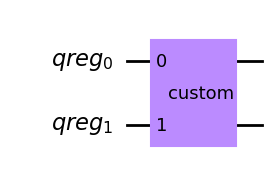

In [2]:
q =  QuantumRegister(2,"qreg")
qc = QuantumCircuit(q)

random_unitary = unitary_group.rvs(4)
print(random_unitary)

customUnitary = Operator(random_unitary)
qc.unitary(customUnitary, [q[0], q[1]], label='custom')
qc.draw(output='mpl', style='clifford')

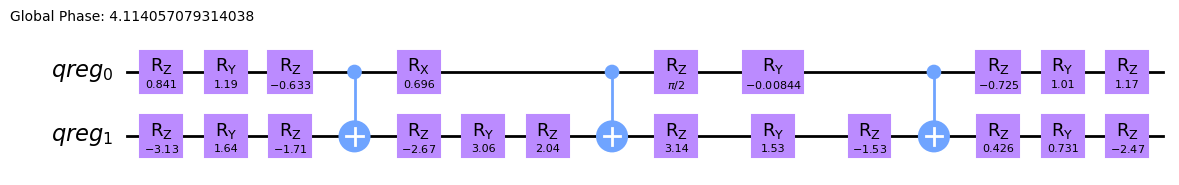

In [12]:
newCircuit = transpile(qc, basis_gates=['cx', 'rx', 'ry', 'rz'], optimization_level = 3)
newCircuit.draw(output='mpl', style='clifford')